In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
clusteringData = pd.read_csv("../ClusteringData/ClusteringDF.csv")

missingValues = clusteringData.isnull().sum()
missingValues

file_name                         0
std_dev                           0
mean_time_diff                    0
median_time_diff                  0
max_peak                          0
median_peak                       0
std_peak                          0
avg_peaks_per_second              0
sum_peak_magnitude                0
percent_time_above_threshold      0
mean_post_peak_magnitude        170
std_dev_post_peak_magnitude     170
dtype: int64

In [3]:
clusteringData.drop(['file_name', 'mean_post_peak_magnitude', 'std_dev_post_peak_magnitude'], axis = 1, inplace= True)

clusteringData.isnull().sum()

std_dev                         0
mean_time_diff                  0
median_time_diff                0
max_peak                        0
median_peak                     0
std_peak                        0
avg_peaks_per_second            0
sum_peak_magnitude              0
percent_time_above_threshold    0
dtype: int64

In [4]:
clusteringData.dtypes

std_dev                         float64
mean_time_diff                  float64
median_time_diff                float64
max_peak                        float64
median_peak                     float64
std_peak                        float64
avg_peaks_per_second            float64
sum_peak_magnitude              float64
percent_time_above_threshold    float64
dtype: object

In [5]:
# Standardize
scaler = StandardScaler()
scaledData = scaler.fit_transform(clusteringData)

In [6]:
# Apply PCA
pca = PCA()
pcaData = pca.fit_transform(scaledData)

In [7]:
# Create DataFrame for PCA results
pcaDF = pd.DataFrame(data=pcaData, columns=[f'PCA{i+1}' for i in range(pca.n_components_)])

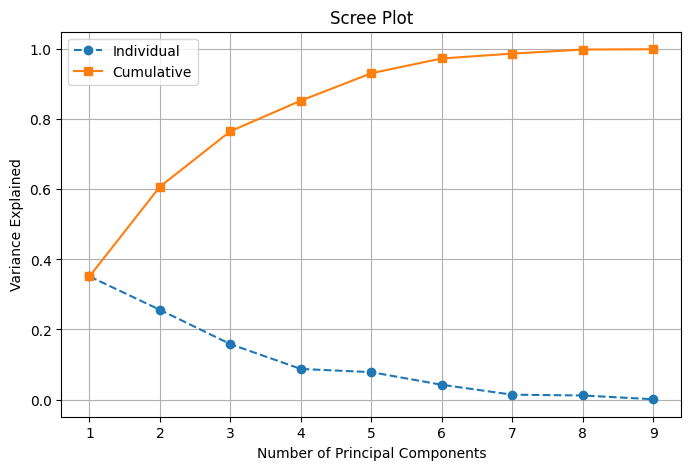

In [8]:
# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', label='Individual')
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='s', linestyle='-', label='Cumulative')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.legend()
plt.grid()
plt.show()

In [9]:
# Display explained variance metrics
pca_summary = pd.DataFrame({
    'Component': np.arange(1, len(explained_variance) + 1),
    'Explained Variance': explained_variance,
    'Cumulative Variance': cumulative_variance
})

print("\nPCA Explained Variance Summary:")
print(pca_summary)

# PCA Loadings (Feature contributions)
loadings = pd.DataFrame(pca.components_.T, columns=[f'PCA{i+1}' for i in range(pca.n_components_)])
print("\nPCA Loadings (Feature Contributions):")
print(loadings)

# Reconstruction Error (Measure of info loss)
reconstructed = pca.inverse_transform(pcaData)
reconstruction_error = np.mean((scaledData - reconstructed) ** 2)
print(f"\nPCA Reconstruction Error: {reconstruction_error:.6f}")


PCA Explained Variance Summary:
   Component  Explained Variance  Cumulative Variance
0          1            0.351531             0.351531
1          2            0.256098             0.607629
2          3            0.158232             0.765861
3          4            0.087355             0.853216
4          5            0.078188             0.931404
5          6            0.042190             0.973594
6          7            0.013873             0.987467
7          8            0.011610             0.999077
8          9            0.000923             1.000000

PCA Loadings (Feature Contributions):
       PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0  0.332013  0.302188 -0.022628 -0.529226 -0.290899  0.646630  0.037843   
1  0.424831  0.361379  0.101733  0.089338  0.369872 -0.124898  0.037076   
2  0.414477  0.364748  0.102283  0.124802  0.395456 -0.141348  0.085612   
3 -0.371917  0.427190 -0.215474  0.021970  0.064206 -0.035261 -0.561804   
4 -0.191580  